In [2]:
!pwd

/home/br/sweethome/ferm/worm_disord/analyze


In [2]:
import io
import glob

import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
# Bring in the utilities module
import sys
sys.path.insert(0, '../util')

# allow hot changes in util.py
import importlib
import util
importlib.reload(util)

from util import fit_Tc, replica_average, read_res

## Convergence analysis: plot `nmnm` distributions

In [4]:
def load_nmnm(fname):
    nmnm = np.loadtxt(fname)
    mask = nmnm[:, 1] > 0
    return nmnm[mask]

def overlay_gaussian(nm):
    """Cook up a gaussian shaped curve with sample 1st and 2nd moments.
    """
    x, y = nm.T
    m1 = (x * y).sum()
    m2 = ((x - m1)**2 * y).sum() 
    
    arr = np.exp(-(x - m1)**2 / 2 / m2)
    arr /= arr.sum()
    return arr 

In [5]:
def plot_nmnm(fnames, fname_unif):
    fig, axx = plt.subplots(len(fnames)//3+1, 3, figsize=(9, 15))

    for fname, ax in zip(fnames, axx.ravel()):
        nm = load_nmnm(fname)

        ax.plot(nm[:, 0], nm[:, 1], 'o')
        ax.plot(nm[:, 0], overlay_gaussian(nm), '-', lw=3)
        ax.set_title( fname.split("/nmnm_")[-1].split(".dat")[0])
        ax.grid(True)
        
        nm_unif = load_nmnm(fname_unif)
        ax.plot(nm_unif[:, 0], nm_unif[:, 1], '--', color='C4')
        
    plt.tight_layout()

## Collect MC data / compute the replica statistics

In [6]:
def resample_g_im(L, beta, reslines, show=False):
    """Read a set of result_XXX files and replica average g_im.
    
    reslines is the list of result_XXX files to process.
    """
    resdict = {"L": L, "beta": beta}
    
    df = read_res(reslines)
    print(reslines)
    
    from IPython.display import display
    display(df)
    
    samples = replica_average(df["g_im"], df["err_g_im"])

    m, s = samples.mean(), samples.std()
    resdict["g_im"] = m
    resdict["err_g_im"] = s
    print(m, '+/-', s)

    if show:
        plt.hist(samples, density=True, bins=100, histtype='step')
        plt.axvline(m, lw=5, color='C1')
        plt.axvspan(m-s, m+s, alpha=0.4, color='C1')
        plt.title(str(m) + "+/-" + str(s))
    return resdict

# Process L=6


### Analyze $L=6$, $\beta = 3.5$

['../runs/L6b3.5/res_L6b3.5r4a0.1.dat', '../runs/L6b3.5/res_L6b3.5r3a0.1.dat', '../runs/L6b3.5/res_L6b3.5r1a0.1.dat', '../runs/L6b3.5/res_L6b3.5r10a0.1.dat', '../runs/L6b3.5/res_L6b3.5r5a0.1.dat', '../runs/L6b3.5/res_L6b3.5r9a0.1.dat', '../runs/L6b3.5/res_L6b3.5r2a0.1.dat', '../runs/L6b3.5/res_L6b3.5r7a0.1.dat', '../runs/L6b3.5/res_L6b3.5r6a0.1.dat', '../runs/L6b3.5/res_L6b3.5r8a0.1.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           4  0.184929     0.000334            T  0.083769  0.000645   
1           3  0.171659     0.000410            T  0.072381  0.000572   
2           1  0.169371     0.000412            T  0.070404  0.000408   
3          10  0.177601     0.000430            T  0.076570  0.000694   
4           5  0.163729     0.000312            T  0.066514  0.000375   
5           9  0.159755     0.000274            T  0.062684  0.000394   
6           2  0.168192     0.000379            T  0.069945  0.000648   
7           7  0.159972     0.000315            T  0.063386  0.000330   
8           6  0.180920     0.000503            T  0.080947  0.000638   
9           8  0.181314     0.000412            T  0.080763  0.000716   

  conv_g_im      Z(mln)  
0         T  218.616277  
1         T  322.923431  
2         T  319.558336  
3         T  187.820970  
4         T  368.362091  
5         T  409.722178  
6         F  256.019088  
7         T  396.708176  
8         T  179.530532  
9         T  175.597718

0.07273612783461868 +/- 0.00017655403780929087


<IPython.core.display.Javascript object>


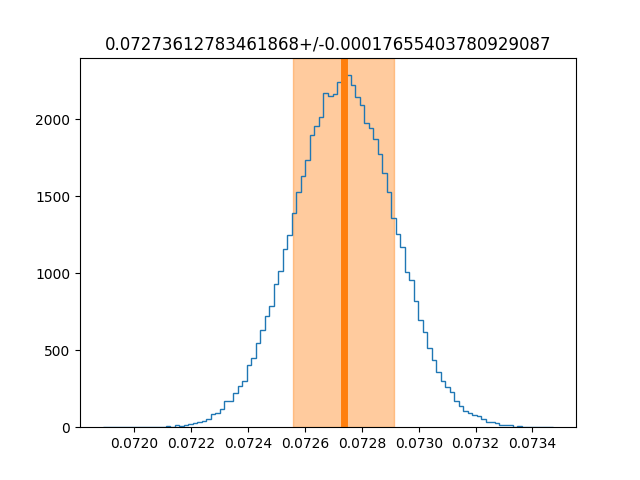

In [24]:
L, beta = 6, 3.5
dct_L6b35 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/L{L}b{beta}/res*"),
        show=True)

<IPython.core.display.Javascript object>


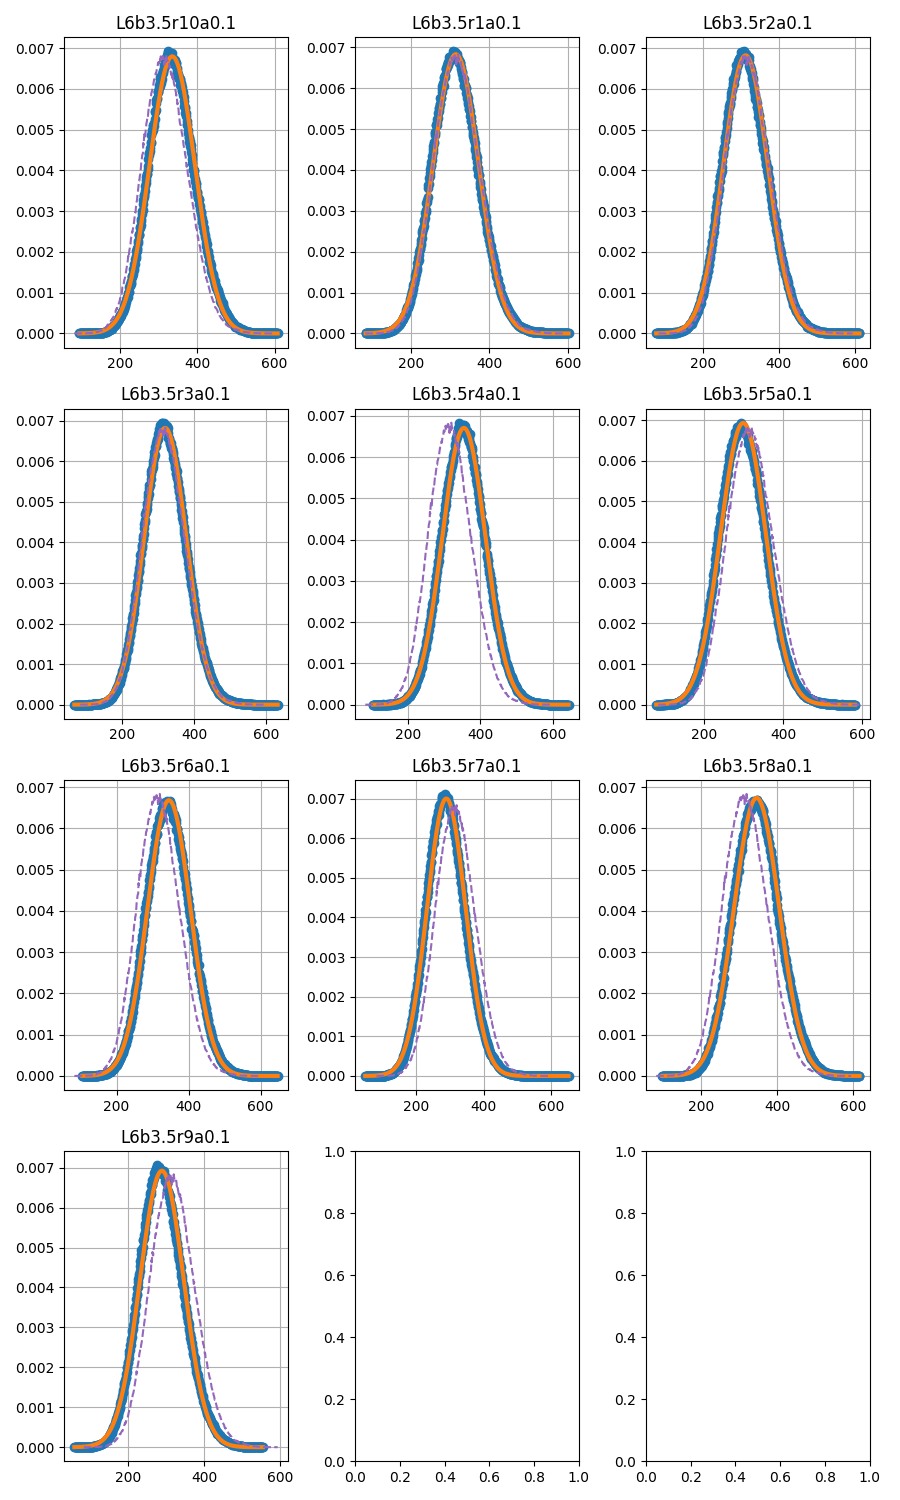

In [9]:
fnames = !ls ../runs/L6b3.5/nmnm*
fname_unif = '../repro_runs/m5.2L6/nmnm_m5.2L6b3.5_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=6$, $\beta=4.0$

['../runs/L6b4.0/res_L6b4.0r7a0.1.dat', '../runs/L6b4.0/res_L6b4.0r6a0.1.dat', '../runs/L6b4.0/res_L6b4.0r3a0.1.dat', '../runs/L6b4.0/res_L6b4.0r5a0.1.dat', '../runs/L6b4.0/res_L6b4.0r2a0.1.dat', '../runs/L6b4.0/res_L6b4.0r1a0.1.dat', '../runs/L6b4.0/res_L6b4.0r8a0.1.dat', '../runs/L6b4.0/res_L6b4.0r4a0.1.dat', '../runs/L6b4.0/res_L6b4.0r9a0.1.dat', '../runs/L6b4.0/res_L6b4.0r10a0.1.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           7  0.155898     0.000287            T  0.098597  0.000614   
1           6  0.178510     0.000425            T  0.130117  0.001100   
2           3  0.168792     0.000338            T  0.116663  0.000966   
3           5  0.160488     0.000423            T  0.106015  0.001182   
4           2  0.165304     0.000373            T  0.111702  0.000823   
5           1  0.166466     0.000326            T  0.112788  0.001126   
6           8  0.179161     0.000394            T  0.131261  0.001097   
7           4  0.184218     0.000468            T  0.138701  0.001351   
8           9  0.154484     0.000295            T  0.098301  0.000769   
9          10  0.175660     0.000326            T  0.128410  0.001170   

  conv_g_im      Z(mln)  
0         T  205.733408  
1         T  100.424124  
2         T  137.180873  
3         F  141.753234  
4         T  163.685642  
5         F  162.725295  
6         T  105.112868  
7         T  112.222083  
8         T  222.716103  
9         T  139.880731

0.11725496779527562 +/- 0.0003285439586170563


<IPython.core.display.Javascript object>


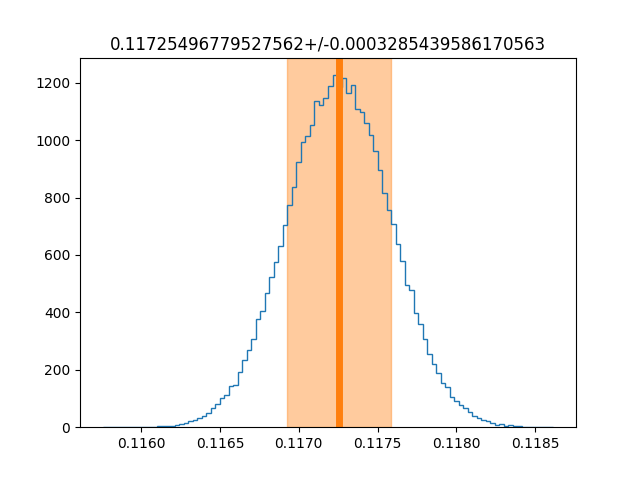

In [22]:
L, beta = 6, 4.0
dct_L6b40 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/L{L}b{beta}/res*"),
        show=True)

<IPython.core.display.Javascript object>


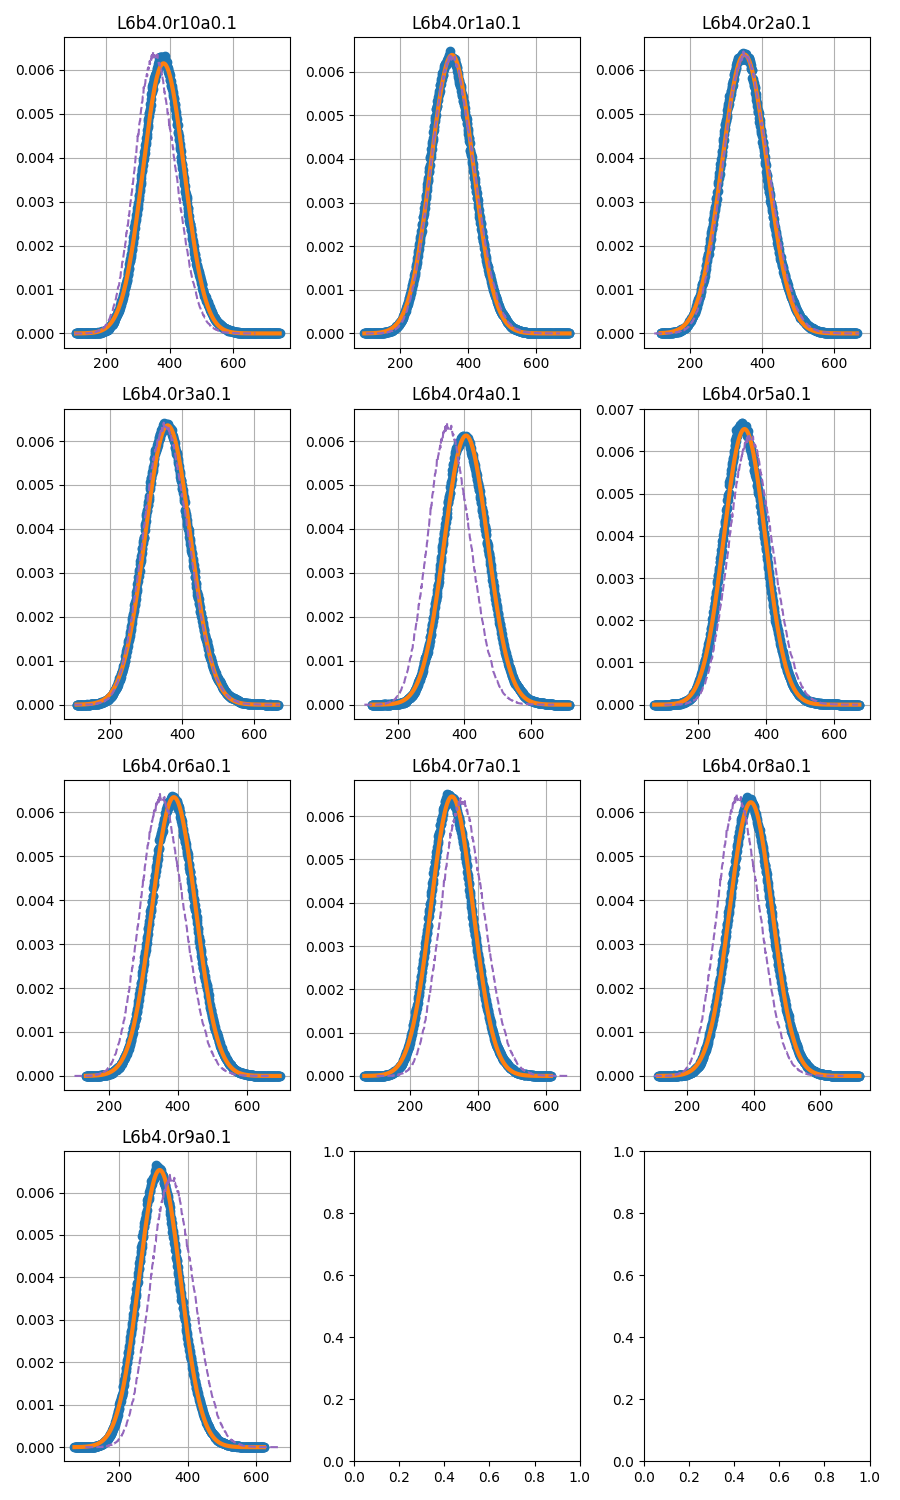

In [12]:
fnames = !ls ../runs/L6b4.0/nmnm*
fname_unif = '../repro_runs/m5.2L6/nmnm_m5.2L6b4.0_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=6$, $\beta=4.5$

In [21]:
L, beta = 6, 4.5
dct_L6b45 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/L{L}b{beta}/res*"),
        show=False)

['../runs/L6b4.5/res_L6b4.5r5a0.1.dat', '../runs/L6b4.5/res_L6b4.5r10a0.1.dat', '../runs/L6b4.5/res_L6b4.5r7a0.1.dat', '../runs/L6b4.5/res_L6b4.5r6a0.1.dat', '../runs/L6b4.5/res_L6b4.5r8a0.1.dat', '../runs/L6b4.5/res_L6b4.5r9a0.1.dat', '../runs/L6b4.5/res_L6b4.5r2a0.1.dat', '../runs/L6b4.5/res_L6b4.5r1a0.1.dat', '../runs/L6b4.5/res_L6b4.5r3a0.1.dat', '../runs/L6b4.5/res_L6b4.5r4a0.1.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           5  0.160663     0.000462            T  0.147883  0.001416   
1          10  0.176751     0.000369            T  0.174216  0.002215   
2           7  0.155684     0.000272            T  0.138793  0.001171   
3           6  0.181024     0.000457            T  0.180425  0.001976   
4           8  0.181820     0.000565            T  0.181482  0.001545   
5           9  0.154334     0.000523            T  0.137258  0.001579   
6           2  0.165874     0.000338            T  0.154919  0.001312   
7           1  0.167219     0.000319            T  0.159794  0.001966   
8           3  0.169848     0.000329            T  0.161567  0.001702   
9           4  0.184799     0.000544            T  0.184380  0.001887   

  conv_g_im      Z(mln)  
0         T  100.252267  
1         F   64.891114  
2         T  122.756382  
3         T   67.024091  
4         T   66.709982  
5         T  134.391545  
6         T   76.791331  
7         F   89.079873  
8         T   78.858520  
9         T   53.465784

0.16207136120124568 +/- 0.0005378555615229039


<IPython.core.display.Javascript object>


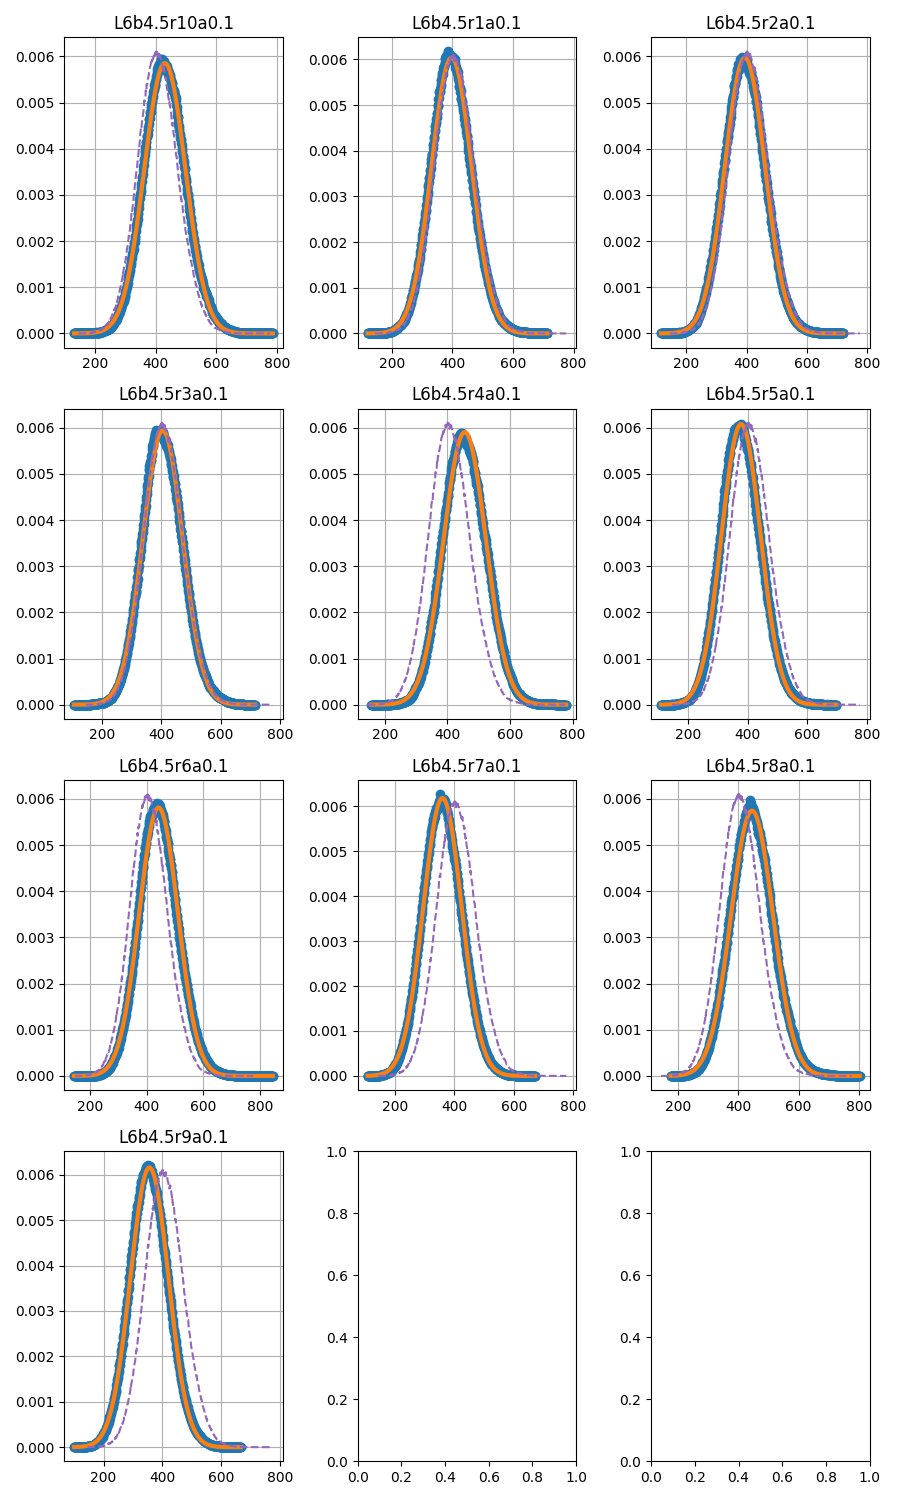

In [15]:
fnames = !ls ../runs/L6b4.5/nmnm*
fname_unif = '../repro_runs/m5.2L6/nmnm_m5.2L6b4.5_1.dat'
plot_nmnm(fnames, fname_unif)

## collect L=6 

In [25]:
df = pd.DataFrame([dct_L6b35, dct_L6b40, dct_L6b45])
df

L  beta      g_im  err_g_im
0  6   3.5  0.072736  0.000177
1  6   4.0  0.117255  0.000329
2  6   4.5  0.162071  0.000538

In [17]:
# SAVE L=6
df.to_csv("m5.2L6_av_replicas.dat")
print(df.to_csv())

,L,beta,g_im,err_g_im
0,6,3.5,0.07273619241738194,0.0001769013784177102
1,6,4.0,0.11722862313123726,0.0003334662184320553
2,6,4.5,0.16195933205798857,0.0005283940158537283



# Read in L=6 simulations

In [19]:
df_L6 = pd.read_csv("m5.2L6_av_replicas.dat")
df_L6

Unnamed: 0  L  beta      g_im  err_g_im
0           0  6   3.5  0.072736  0.000177
1           1  6   4.0  0.117229  0.000333
2           2  6   4.5  0.161959  0.000528

# Process L=8 simulations


### Analyze $L=8$, $\beta = 4.0$

['../runs/L8b4.0/res_L8b4.0r4a0.1.dat', '../runs/L8b4.0/res_L8b4.0r2a0.1.dat', '../runs/L8b4.0/res_L8b4.0r7a0.1.dat', '../runs/L8b4.0/res_L8b4.0r5a0.1.dat', '../runs/L8b4.0/res_L8b4.0r3a0.1.dat', '../runs/L8b4.0/res_L8b4.0r8a0.1.dat', '../runs/L8b4.0/res_L8b4.0r9a0.1.dat', '../runs/L8b4.0/res_L8b4.0r1a0.1.dat', '../runs/L8b4.0/res_L8b4.0r6a0.1.dat', '../runs/L8b4.0/res_L8b4.0r10a0.1.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           4  0.174669     0.001948            T  0.127195  0.010534   
1           2  0.161578     0.001621            F  0.112685  0.007237   
2           7  0.153436     0.001577            T  0.080002  0.004443   
3           5  0.153605     0.001481            T  0.086315  0.003808   
4           3  0.167519     0.002172            T  0.122792  0.012108   
5           8  0.168737     0.001941            T  0.126608  0.010556   
6           9  0.149082     0.001597            T  0.078128  0.003107   
7           1  0.164855     0.002423            T  0.109284  0.008552   
8           6  0.175441     0.004406            T  0.141278  0.011251   
9          10  0.174789     0.003486            T  0.136660  0.008958   

  conv_g_im     Z(mln)  
0         T   3.982398  
1         F   5.955630  
2         F   8.428445  
3         T   8.880700  
4         F   4.547941  
5         T   4.106250  
6         T  10.756733  
7         F   5.278254  
8         T   3.822174  
9         T   3.624405

0.11209539589215221 +/- 0.0027217060237785373


<IPython.core.display.Javascript object>


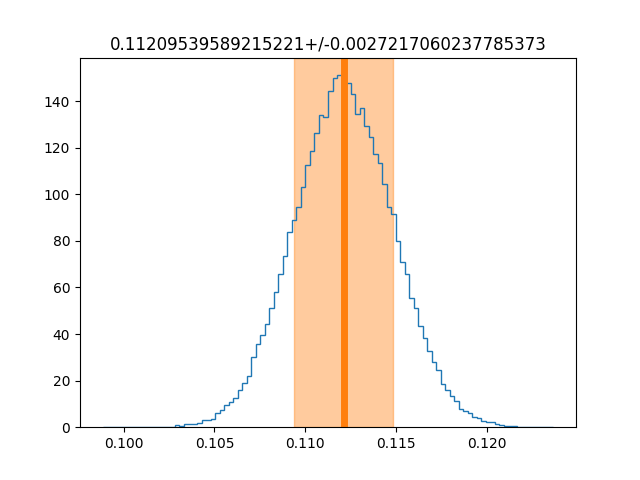

In [27]:
L, beta = 8, 4.0
dct_L8b40 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/L{L}b{beta}/res*"),
        show=True)

<IPython.core.display.Javascript object>


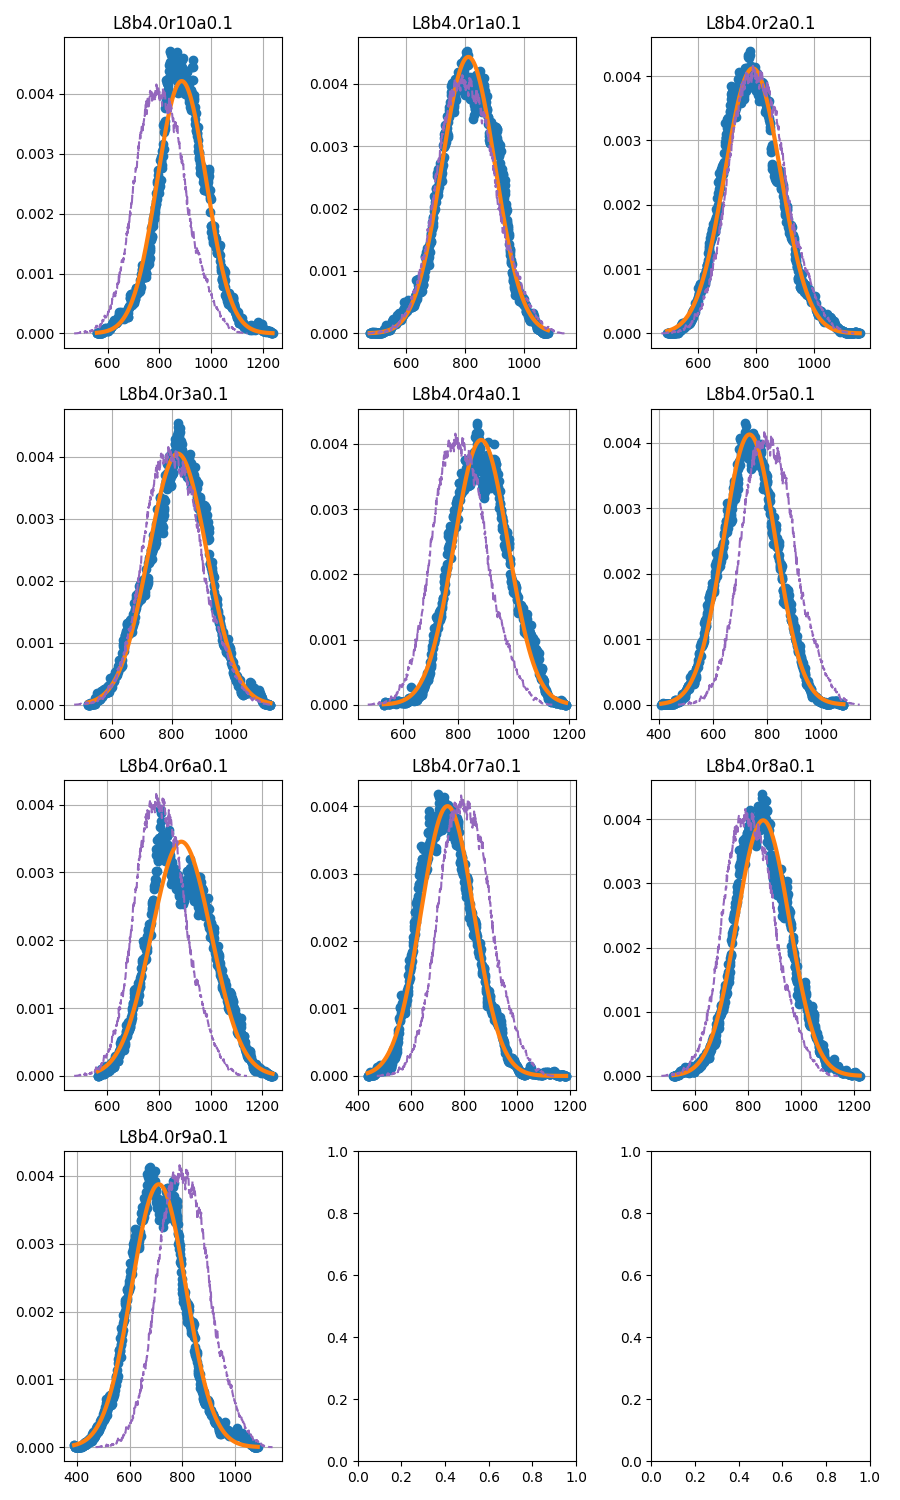

In [102]:
fnames = !ls ../runs/L8b4.0/nmnm*
fname_unif = '../repro_runs/m5.2L8/nmnm_m5.2L8b4.0_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=8$, $\beta = 4.25$

['../runs/L8b4.25/res_L8b4.25r4a0.1.dat', '../runs/L8b4.25/res_L8b4.25r8a0.1.dat', '../runs/L8b4.25/res_L8b4.25r2a0.1.dat', '../runs/L8b4.25/res_L8b4.25r7a0.1.dat', '../runs/L8b4.25/res_L8b4.25r9a0.1.dat', '../runs/L8b4.25/res_L8b4.25r6a0.1.dat', '../runs/L8b4.25/res_L8b4.25r10a0.1.dat', '../runs/L8b4.25/res_L8b4.25r3a0.1.dat', '../runs/L8b4.25/res_L8b4.25r1a0.1.dat', '../runs/L8b4.25/res_L8b4.25r5a0.1.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           4  0.177721     0.002886            T  0.197612  0.017547   
1           8  0.176441     0.001849            T  0.176162  0.011217   
2           2  0.162883     0.001627            T  0.133355  0.011564   
3           7  0.150795     0.001973            F  0.124959  0.006003   
4           9  0.147237     0.000821            T  0.107826  0.003158   
5           6  0.172680     0.001612            T  0.144075  0.009109   
6          10  0.170121     0.001692            F  0.154142  0.009328   
7           3  0.165178     0.001267            F  0.148807  0.010702   
8           1  0.164009     0.002044            T  0.134437  0.006993   
9           5  0.158491     0.001447            T  0.134245  0.007283   

  conv_g_im     Z(mln)  
0         T   2.134172  
1         T   2.337931  
2         T   3.754357  
3         F   5.397018  
4         T  14.960398  
5         T   2.978193  
6         T   5.053870  
7         T   3.050970  
8         T   3.885351  
9         F   4.548784

0.14555713011785756 +/- 0.0031571216538176594


<IPython.core.display.Javascript object>


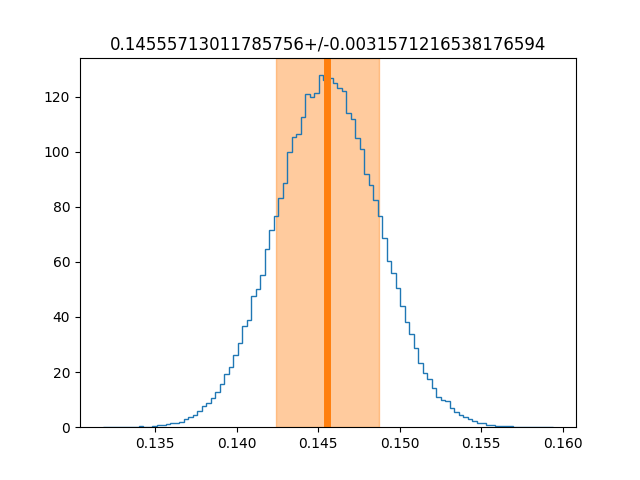

In [28]:
L, beta = 8, 4.25
dct_L8b425 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/L{L}b{beta}/res*"),
        show=True)

<IPython.core.display.Javascript object>


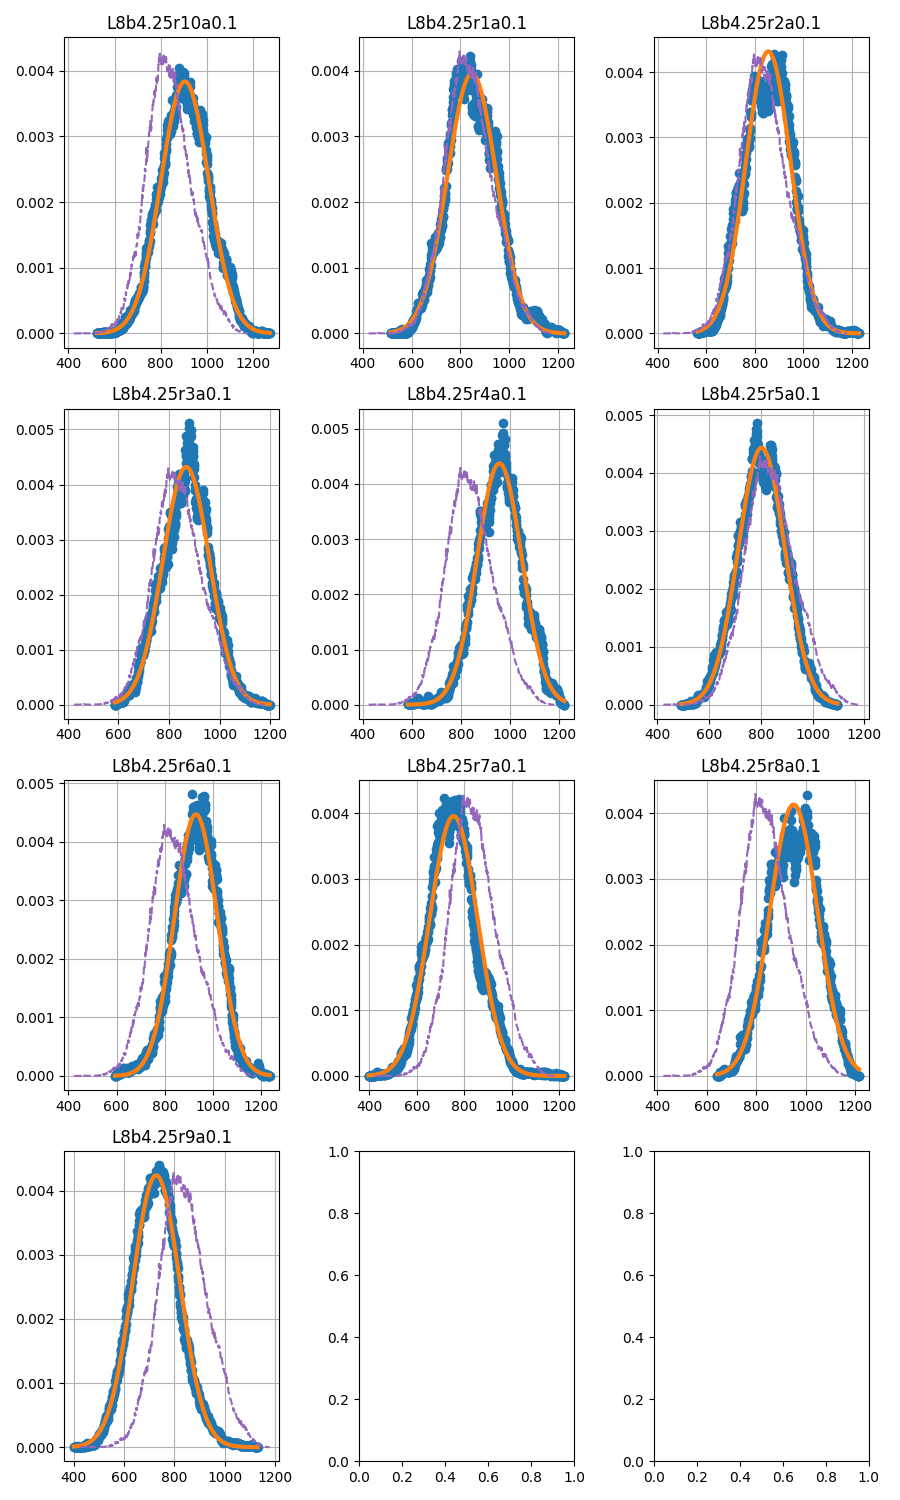

In [106]:
fnames = !ls ../runs/L8b4.25/nmnm*
fname_unif = '../repro_runs/m5.2L8/nmnm_m5.2L8b4.25_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=8$, $\beta = 4.5$

['../runs/L8b4.5/res_L8b4.5r2a0.1.dat', '../runs/L8b4.5/res_L8b4.5r8a0.1.dat', '../runs/L8b4.5/res_L8b4.5r3a0.1.dat', '../runs/L8b4.5/res_L8b4.5r5a0.1.dat', '../runs/L8b4.5/res_L8b4.5r6a0.1.dat', '../runs/L8b4.5/res_L8b4.5r10a0.1.dat', '../runs/L8b4.5/res_L8b4.5r9a0.1.dat', '../runs/L8b4.5/res_L8b4.5r7a0.1.dat', '../runs/L8b4.5/res_L8b4.5r1a0.1.dat', '../runs/L8b4.5/res_L8b4.5r4a0.1.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           2  0.165414     0.001464            T  0.188530  0.012117   
1           8  0.174262     0.001361            F  0.210224  0.010426   
2           3  0.167740     0.001542            T  0.185219  0.008475   
3           5  0.155462     0.001422            T  0.170234  0.008315   
4           6  0.176477     0.002382            F  0.207903  0.014224   
5          10  0.171804     0.001096            T  0.198321  0.006647   
6           9  0.148656     0.000818            T  0.139451  0.004226   
7           7  0.152080     0.001624            T  0.147679  0.011913   
8           1  0.161519     0.001237            T  0.179504  0.008671   
9           4  0.176529     0.002456            F  0.204364  0.010919   

  conv_g_im    Z(mln)  
0         T  3.751809  
1         F  2.852498  
2         T  3.633172  
3         F  5.559171  
4         T  2.571630  
5         T  8.785985  
6         T  9.532507  
7         T  7.829625  
8         T  4.635688  
9         F  2.835802

0.1831407741102359 +/- 0.0031461288992579474


<IPython.core.display.Javascript object>


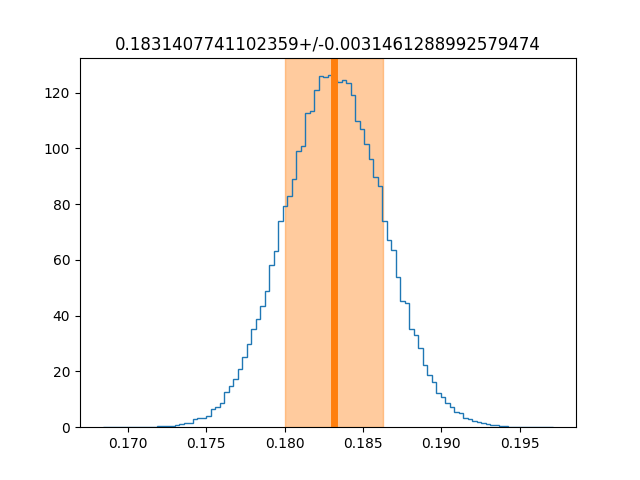

In [29]:
L, beta = 8, 4.5
dct_L8b45 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/L{L}b{beta}/res*"),
        show=True)

<IPython.core.display.Javascript object>


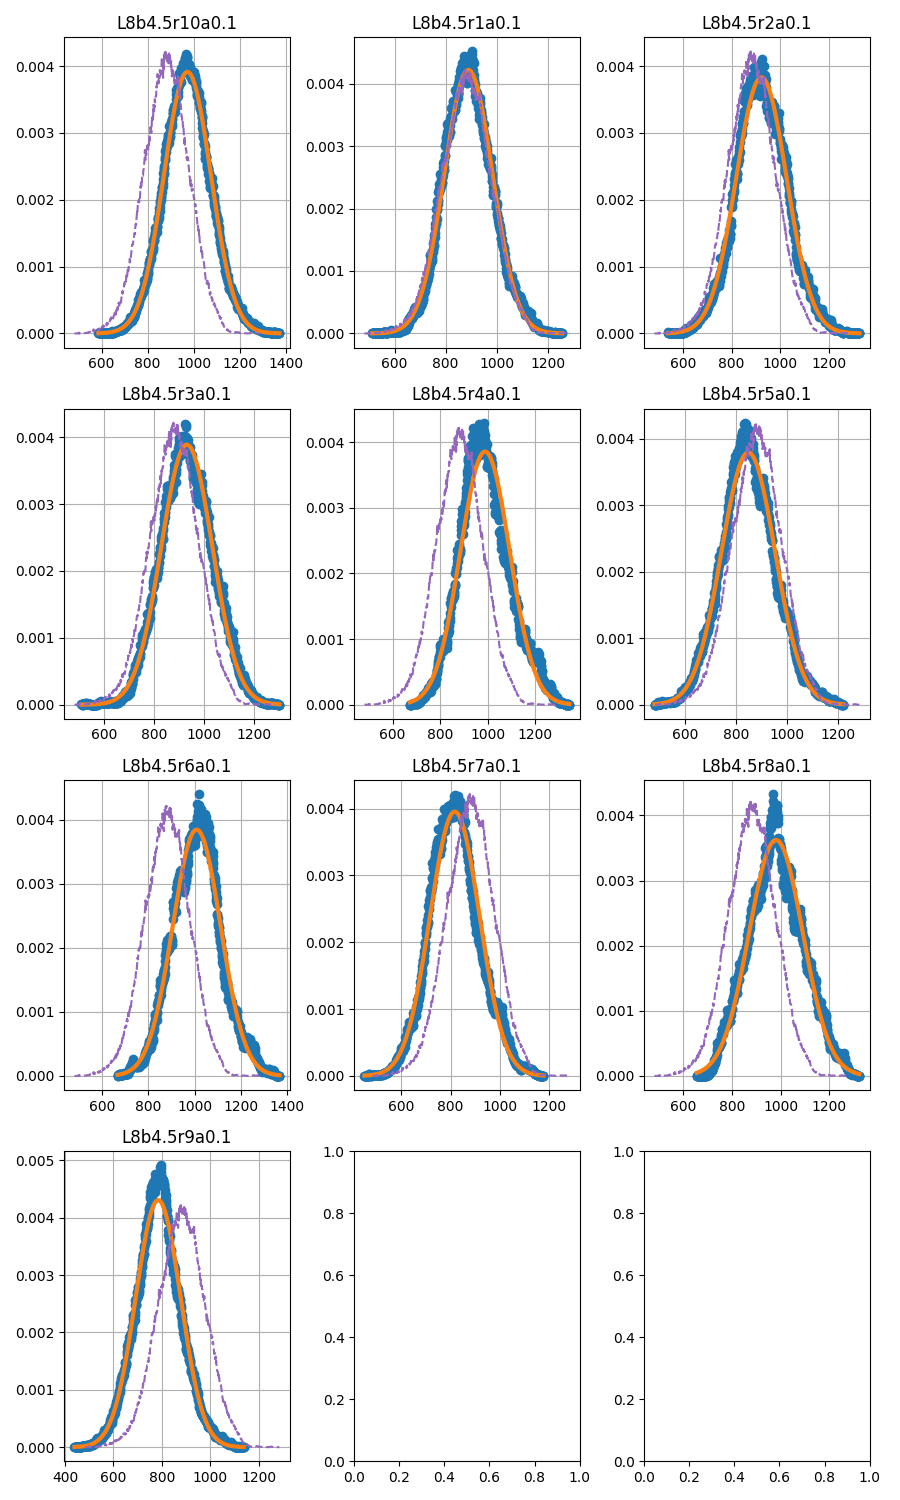

In [109]:
fnames = !ls ../runs/L8b4.5/nmnm*
fname_unif = '../repro_runs/m5.2L8/nmnm_m5.2L8b4.5_1.dat'
plot_nmnm(fnames, fname_unif)

## collect L=8

In [30]:
df = pd.DataFrame([dct_L8b40, dct_L8b425, dct_L8b45])
df.to_csv("m5.2L8_av_replicas.dat")
df

L  beta      g_im  err_g_im
0  8  4.00  0.112095  0.002722
1  8  4.25  0.145557  0.003157
2  8  4.50  0.183141  0.003146

In [111]:
df_L6L8 = pd.concat([df_L6, df])
df_L6L8

Unnamed: 0  L  beta      g_im  err_g_im
0         0.0  6  3.50  0.072736  0.000177
1         1.0  6  4.00  0.117229  0.000333
2         2.0  6  4.50  0.161959  0.000528
0         NaN  8  4.00  0.112094  0.002727
1         NaN  8  4.25  0.145562  0.003161
2         NaN  8  4.50  0.183140  0.003155

# Process L=12 simulations


### Analyze $L=12$, $\beta = 4.2$

['../runs/L12b4.2/res_L12b4.2r1a0.1.dat', '../runs/L12b4.2/res_L12b4.2r9a0.1.dat', '../runs/L12b4.2/res_L12b4.2r5a0.1.dat', '../runs/L12b4.2/res_L12b4.2r6a0.1.dat', '../runs/L12b4.2/res_L12b4.2r10a0.1.dat', '../runs/L12b4.2/res_L12b4.2r4a0.1.dat', '../runs/L12b4.2/res_L12b4.2r3a0.1.dat', '../runs/L12b4.2/res_L12b4.2r2a0.1.dat', '../runs/L12b4.2/res_L12b4.2r7a0.1.dat', '../runs/L12b4.2/res_L12b4.2r8a0.1.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           1  0.156767     0.001177            T  0.116759  0.006470   
1           9  0.142270     0.000908            T  0.072045  0.006640   
2           5  0.151835     0.001481            T  0.097508  0.005310   
3           6  0.163662     0.001008            T  0.140808  0.009809   
4          10  0.161503     0.001954            T  0.133175  0.011732   
5           4  0.163962     0.002371            T  0.122430  0.010620   
6           3  0.157918     0.001593            T  0.129867  0.010492   
7           2  0.151590     0.000996            T  0.095100  0.005728   
8           7  0.143698     0.001009            T  0.063250  0.003909   
9           8  0.163228     0.002758            T  0.126884  0.009526   

  conv_g_im     Z(mln)  
0         T   8.266791  
1         F   8.867857  
2         T   5.710822  
3         T   3.463243  
4         T   3.628827  
5         T   7.209133  
6         T   7.245524  
7         F  10.884761  
8         T   8.244776  
9         T   3.579678

0.10978161651717555 +/- 0.002658341591972896


<IPython.core.display.Javascript object>


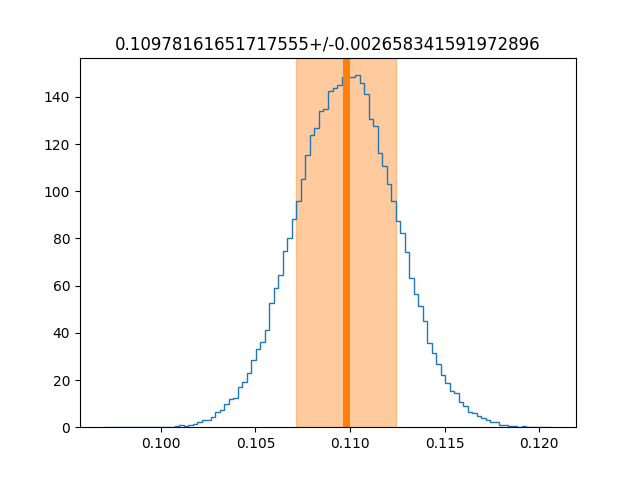

In [7]:
L, beta = 12, 4.2
dct_L12b42 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/L{L}b{beta}/res*"),
        show=True)

<IPython.core.display.Javascript object>


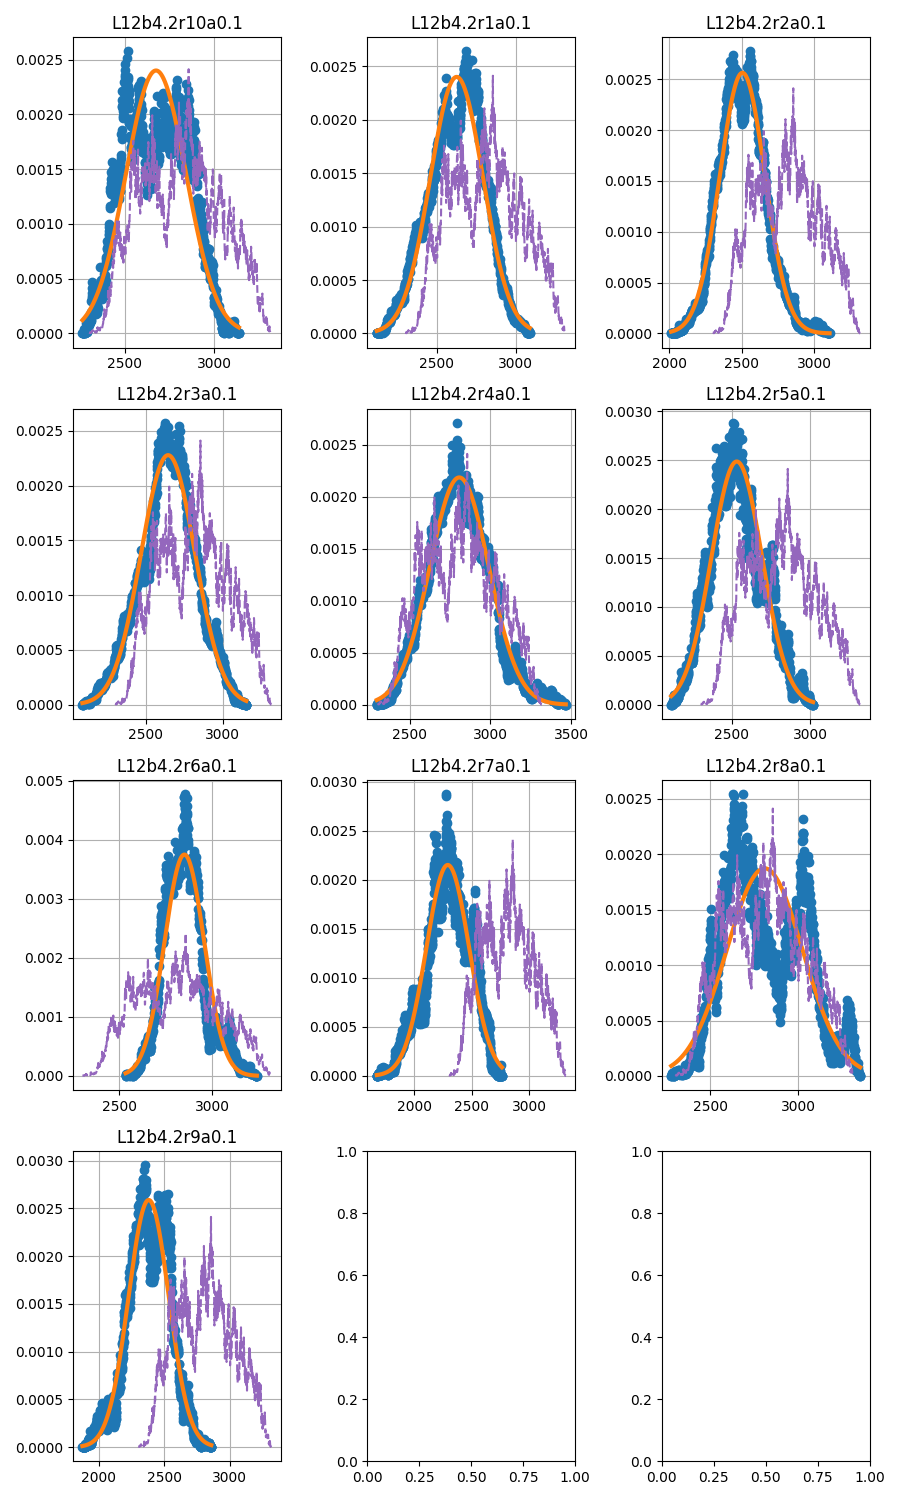

In [8]:
fnames = !ls ../runs/L12b4.2/nmnm*
fname_unif = '../repro_runs/m5.2L12/nmnm_m5.2L12b4.2_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=12$, $\beta = 4.55$

['../runs/L12b4.55/res_L12b4.55r2a0.1.dat', '../runs/L12b4.55/res_L12b4.55r9a0.1.dat', '../runs/L12b4.55/res_L12b4.55r1a0.1.dat', '../runs/L12b4.55/res_L12b4.55r6a0.1.dat', '../runs/L12b4.55/res_L12b4.55r5a0.1.dat', '../runs/L12b4.55/res_L12b4.55r3a0.1.dat', '../runs/L12b4.55/res_L12b4.55r8a0.1.dat', '../runs/L12b4.55/res_L12b4.55r10a0.1.dat', '../runs/L12b4.55/res_L12b4.55r7a0.1.dat', '../runs/L12b4.55/res_L12b4.55r4a0.1.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           2  0.154917     0.001298            T  0.224335  0.019679   
1           9  0.143728     0.000783            T  0.166021  0.015359   
2           1  0.151615     0.001874            T  0.194064  0.014997   
3           6  0.165834     0.000944            T  0.232471  0.029525   
4           5  0.150621     0.001357            F  0.192399  0.016650   
5           3  0.163600     0.003158            T  0.229877  0.019905   
6           8  0.162483     0.001971            T  0.246312  0.021649   
7          10  0.162189     0.001030            T  0.226224  0.015027   
8           7  0.145604     0.000840            T  0.169090  0.010579   
9           4  0.167496     0.001591            F  0.258255  0.029189   

  conv_g_im    Z(mln)  
0         T  1.839819  
1         T  2.605452  
2         T  2.272690  
3         T  1.521716  
4         T  2.358992  
5         T  1.625696  
6         T  1.538971  
7         T  2.269373  
8         T  2.913645  
9         F  1.339074

0.2138973387712658 +/- 0.006347843582342695


<IPython.core.display.Javascript object>


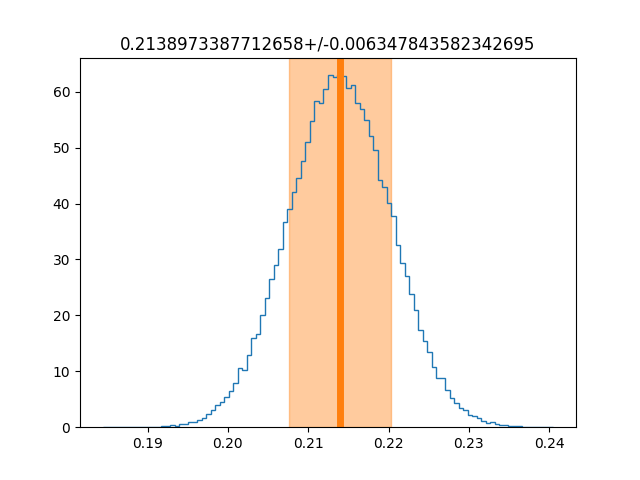

In [9]:
L, beta = 12, 4.55
dct_L12b455 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/L{L}b{beta}/res*"),
        show=True)

<IPython.core.display.Javascript object>


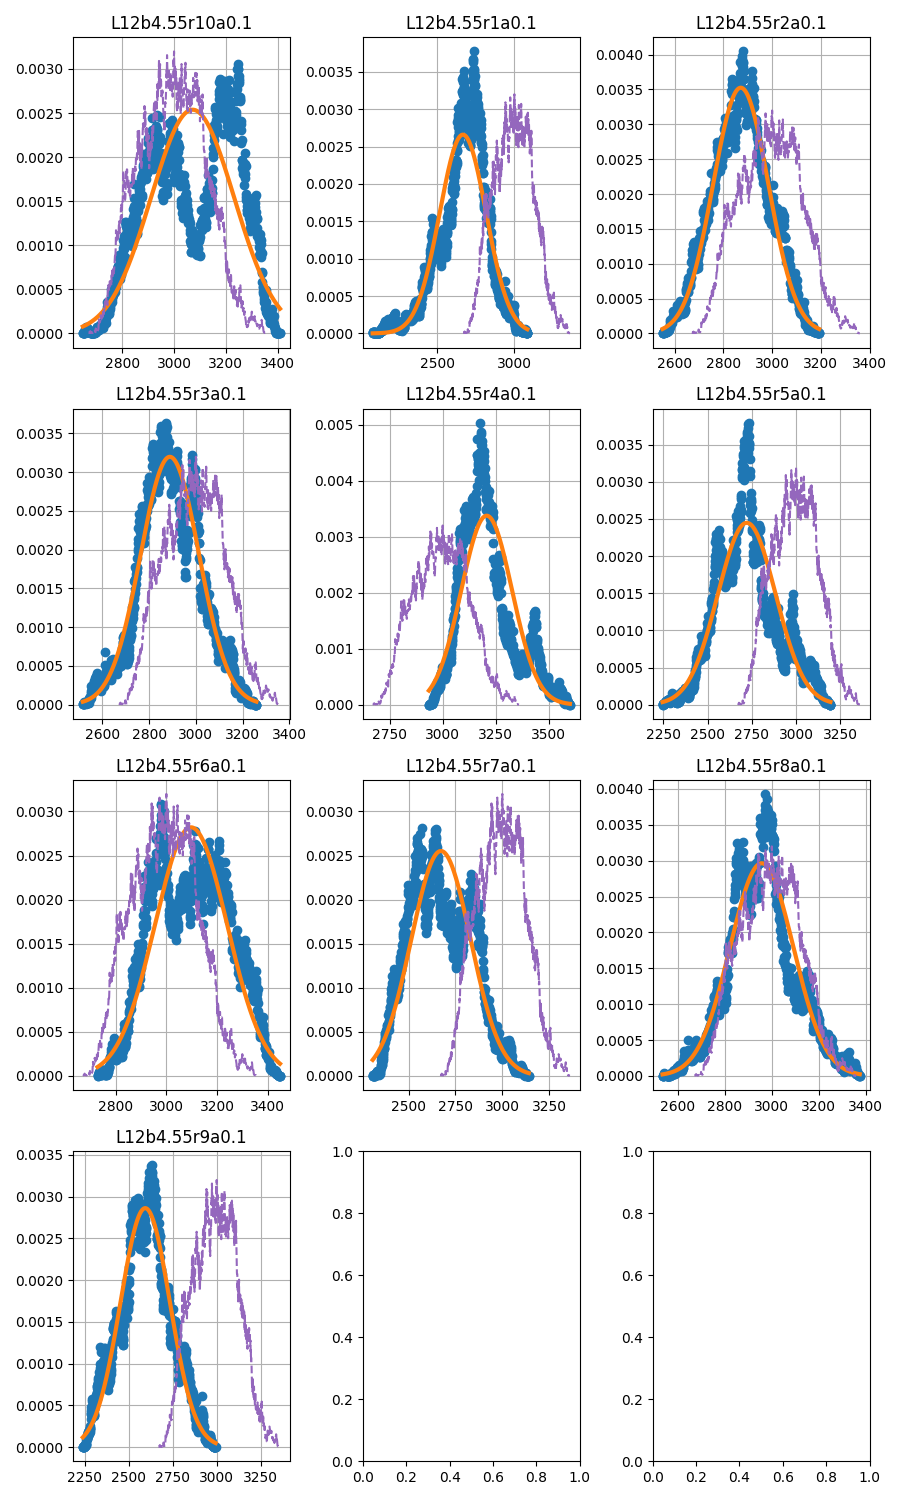

In [10]:
fnames = !ls ../runs/L12b4.55/nmnm*
fname_unif = '../repro_runs/m5.2L12/nmnm_m5.2L12b4.55_1.dat'
plot_nmnm(fnames, fname_unif)

In [11]:
df = pd.DataFrame([dct_L12b42, dct_L12b455])
df.to_csv("m5.2L12_av_replicas.dat")
df

L  beta      g_im  err_g_im
0  12  4.20  0.109782  0.002658
1  12  4.55  0.213897  0.006348

## Read in L=6, 8

In [35]:
!ls *dat

m5.2L12_av_replicas.dat  m5.2L6_av_replicas.dat  m5.2L8_av_replicas.dat


In [12]:
df_L6 = pd.read_csv("m5.2L6_av_replicas.dat")
df_L8 = pd.read_csv("m5.2L8_av_replicas.dat")
df_L12 = pd.read_csv("m5.2L12_av_replicas.dat")
df_L6L8L12 = pd.concat([df_L6, df_L8, df_L12])
df_L6L8L12

Unnamed: 0   L  beta      g_im  err_g_im
0           0   6  3.50  0.072736  0.000177
1           1   6  4.00  0.117229  0.000333
2           2   6  4.50  0.161959  0.000528
0           0   8  4.00  0.112095  0.002722
1           1   8  4.25  0.145557  0.003157
2           2   8  4.50  0.183141  0.003146
0           0  12  4.20  0.109782  0.002658
1           1  12  4.55  0.213897  0.006348

# Compare to the uniform simulations

In [19]:
!ls ../repro_data

fit_tc.ipynb  m5.2.dat	README


In [13]:
df_uniform = pd.read_csv("../repro_data/m5.2.dat", sep="\s+")
df_uniform

#L  beta     g_im  err_g_im  density  err_density      Z
0    6  3.50  0.07180    0.0004  0.17092     0.000254  275.0
1    6  4.00  0.11677    0.0008  0.16756     0.000500  129.0
2    6  4.50  0.16630    0.0020  0.17051     0.000200   64.0
3    6  5.00  0.19430    0.0019  0.17178     0.000400   40.0
4    8  3.50  0.04631    0.0016  0.16549     0.002000   24.5
5    8  4.00  0.10630    0.0012  0.16300     0.000500  121.0
6    8  4.25  0.13750    0.0020  0.16000     0.000300  128.2
7    8  4.50  0.17200    0.0015  0.16190     0.000400   88.0
8    8  5.00  0.22460    0.0120  0.16665     0.002000    2.0
9   12  4.20  0.12200    0.0032  0.15770     0.000800   58.0
10  12  4.55  0.22700    0.0050  0.16000     0.000900   26.3

<IPython.core.display.Javascript object>


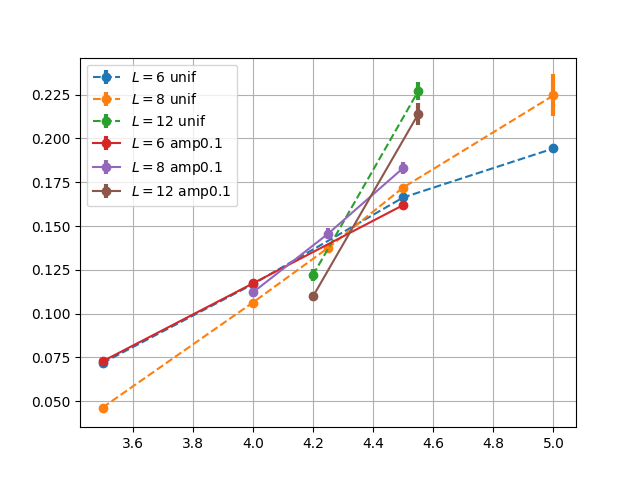

In [14]:
fig, ax = plt.subplots(1, 1)

for L, grp in df_uniform.groupby("#L"):
    ax.errorbar(grp["beta"], grp["g_im"], yerr=grp["err_g_im"],
                fmt='o--', elinewidth=3, label=r"$L=%s$ unif" % L)
    
for L, grp in df_L6L8L12.groupby("L"):
    ax.errorbar(grp["beta"], grp["g_im"], yerr=grp["err_g_im"],
                fmt='o-', elinewidth=3, label=r"$L=%s$ amp0.1" % L)

ax.legend(loc='best')
plt.grid(True)
plt.show()

In [19]:
df_L6L8L12

Unnamed: 0   L  beta      g_im  err_g_im         T
0           0   6  3.50  0.072736  0.000177  0.285714
1           1   6  4.00  0.117229  0.000333  0.250000
2           2   6  4.50  0.161959  0.000528  0.222222
0           0   8  4.00  0.112095  0.002722  0.250000
1           1   8  4.25  0.145557  0.003157  0.235294
2           2   8  4.50  0.183141  0.003146  0.222222
0           0  12  4.20  0.109782  0.002658  0.238095
1           1  12  4.55  0.213897  0.006348  0.219780

# fit Tc

In [16]:
df_L6L8L12["T"] = 1. / df_L6L8L12["beta"]

res = fit_Tc(df_L6L8L12)
print("T_c = ", res.Tc, " +/- ", res.err_Tc)

T_c =  0.21437418118377696  +/-  0.0015025410517900293


<IPython.core.display.Javascript object>


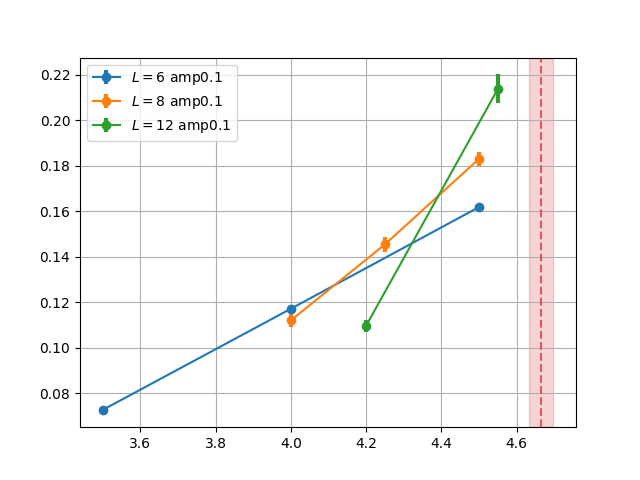

In [18]:
fig, ax = plt.subplots(1, 1)

for L, grp in df_L6L8L12.groupby("L"):
    ax.errorbar(grp["beta"], grp["g_im"], yerr=grp["err_g_im"],
                fmt='o-', elinewidth=3, label=r"$L=%s$ amp0.1" % L)


plt.axvline(res.beta_c, color='C3', alpha=0.7, ls='--')
ax.axvspan(res.beta_c - res.err_beta_c, 
           res.beta_c + res.err_beta_c, alpha=0.2, color="C3")
    
ax.legend(loc='best')
plt.grid(True)
plt.show()

In [17]:
res.beta_c, res.err_beta_c

(4.664740849285055, 0.03269500358349634)